<a href="https://colab.research.google.com/github/Djaxis/MY-Python-Evolution/blob/main/KNN_K_Nearest_Neighbors_classification_Brice_De_Campos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import openai

ModuleNotFoundError: ignored

### **RAPPEL**
Exemple : Classement de fruits basé sur leur poids et leur texture

Imaginons que nous ayons un petit ensemble de données de fruits, où chaque fruit est décrit par son poids (en grammes) et sa texture (échelle de 1 à 10, où 1 est très mou et 10 est très dur).

Données d'entraînement :

Pomme - 150g, texture 6
Pomme - 170g, texture 5
Orange - 140g, texture 8
Orange - 160g, texture 7
Maintenant, disons que nous avons un fruit inconnu avec un poids de 155g et une texture de 6, et nous voulons déterminer s'il s'agit d'une pomme ou d'une orange.

Utilisation de KNN (k=3) :

Calculer la distance entre le fruit inconnu et chaque fruit dans notre ensemble de données d'entraînement. Supposons que nous utilisions la distance euclidienne.
Trouver les 3 fruits les plus proches (car k=3) du fruit inconnu.
Voter en se basant sur les 3 fruits les plus proches pour déterminer la classe du fruit inconnu.
Dans cet exemple, disons que les 3 fruits les plus proches sont les deux pommes et une orange. Puisque les pommes sont majoritaires parmi les 3 voisins les plus proches, nous classerions le fruit inconnu comme une pomme.

Résultat : Le fruit inconnu est classé comme une "Pomme".

Ceci est une illustration très basique de la manière dont KNN fonctionne. Dans des scénarios réels, la dimension des données est souvent bien plus grande et la normalisation des caractéristiques devient cruciale pour obtenir de bonnes performances avec KNN.

pip install notebook --upgrade

DOCUMENTATION OFFICIELLE
https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html


### Cours
https://odyssey.wildcodeschool.com/quests/776
K-NN peut être utilisé pour résoudre à la fois les problèmes de classification et de régression. Dans cette quête, nous ne parlerons que de l'aspect classification des choses. Nous aborderons l'utilisation de k-NN pour la régression dans une autre quête. Souviens-toi que dans les problèmes de classification, le but est de décider entre des options (comme Oui/Non ou Chat/Chien) alors que la régression prédit une valeur numérique réelle.

k fait référence au nombre de voisins les plus proches des données que nous essayons de classer

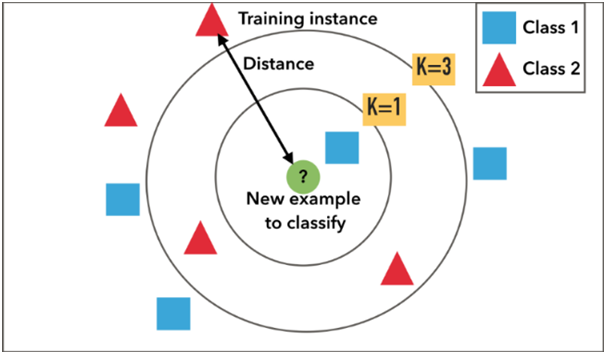

In [3]:
# ici je choisi de prendre letype de model KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier # package d'importation pour le KNN
modelKNN = KNeighborsClassifier() # action d'appel model KNeighborsClassifier
modelKNN.fit(X_train, y_train) #modelKNN. fit pour entrainner les données

NameError: ignored

In [ ]:
# Paramètres du modèle
""""""
k voisins
Tu peux changer le nombre de voisins avec le paramètre n_neighbors. La valeur par défaut est 5
""""""

In [ ]:
# Mise en place
from sklearn.neighbors import KNeighborsClassifier
modelKNN = KNeighborsClassifier(n_neighbors = 7)
modelKNN.fit(X_train, y_train)

In [ ]:
# Poids du modele
""""""
Par défaut, chaque voisin a un poids égal ("uniforme").
Tu peux le modifier pour tenir compte de la distance. Sur l'exemple de l'image ci-dessus, dans le cas de 3 voisins,
la prédiction aurait alors été "carré bleu - classe 1", car il y a un carré bleu très proche (avec plus de poids), et 2 triangles rouges lointains (avec moins de poids).
""""""

Pour aller plus loin
La distance euclidienne n'est pas la seule possible. Suivant les cas, il faut utiliser des mesures de distance différentes.

Par exemple, si tu traverses la ville de New York, tu ne pourras pas aller en diagonal. Tu devras suivre les rues et les avenues. C'est ce qu'on appelle la distance de Manhattan.
 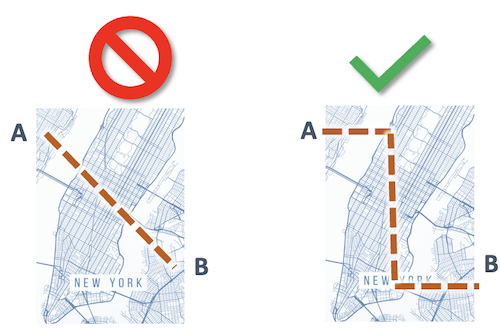

Le problème est le suivant : pour l'algorithme de machine learning, les nombres sont ordonnés. Ainsi, dans cet exemple, le chat et la souris sont proches (avec des valeurs de 1 & 2), tandis que le chien et la souris sont deux fois plus éloignés (0 & 2). Alors que ca dépend seulement de l'ordre dans lequel on les a affichés.
L'algorithme de KNN risque donc de se tromper en trouvant des voisins plus proches avec le chat qu'avec le chien...
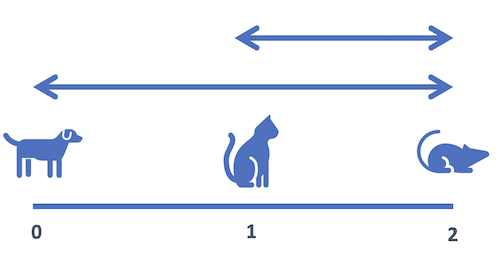

In [ ]:
Get Dummies
Nous préférons alors créer autant de colonnes binaires que de catégories. Le DataFrame créé est grand, mais les résultats sont meilleurs

pd.concat([df_animals , df_animals['animaux'].str.get_dummies()],
          axis = 1)


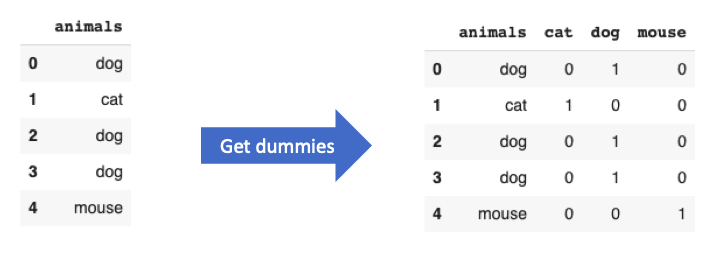

In [ ]:
#Autre exemple
import pandas as pd
df = pd.DataFrame({
    'Couleur': ['rouge', 'bleu', 'vert', 'rouge']
})

df_dummies = pd.get_dummies(df, columns=['Couleur'])
print(df_dummies)

Plus d'informations ici : get_dummies
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html
Métriques
Tu as appris précédemment les régressions, et la métrique la plus connue : R2-score.
Mais elle ne peut pas s'appliquer à des algorithmes de classification.

Matrice de confusion
Pour les classifications, nous allons utiliser les matrices de confusions. Puis calculer un certain nombre de métriques grâce à cette matrice.
La matrice de confusion résume les prédictions du modèle. Ici, prenons l'exemple d'une classification qui distingue les chats et les chiens : voir image cidessous.
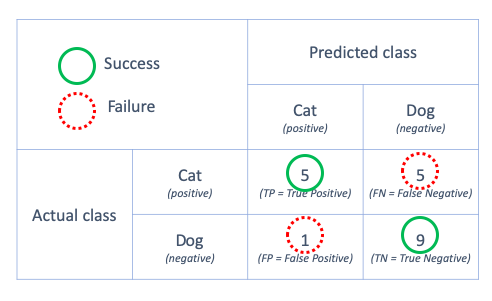
En ligne, la matrice indique les données réelles. Ici il y a 10 chats et 10 chiens dans notre dataset. Nous demandons au modèle de prédire si ce sont des chats ou des chiens. En colonne, la matrice indique ce qui a été prédit par le modèle. Entraine-toi pour voir si tu arrives bien à lire la matrice de confusion.
Comment interpréter cette matrice de confusion?
On essaie de prédire 20 valeurs (5 + 5 + 1 + 9). Parmi ces valeurs :

Vrai Positif (TP) : 5 chats réels sont correctement prédits.
Faux négatif (FN) : 5 chats réels sont prédits à tort comme étant des chiens.
Faux positif (FP) : 1 vrai chien est prédit à tort comme étant un chat.
Vrai négatif (TN) : 9 chiens réels sont correctement prédits

Métriques avec scikit-learn
Score par défaut: accuracy

La méthode .score() de scikit-learn renvoie par défaut l'accuracy score.

model.score(X_train, y_train)

>>> 0.72
---------------------------------------------------------------------

Matrice de confusion avec scikit-learn.

Mais ce n'est pas forcément une bonne métrique. Mieux vaut vérifier avec la matrice de confusion


In [ ]:
from sklearn.metrics import confusion_matrix

pd.DataFrame(data = confusion_matrix(y_true = y_test, y_pred = model.predict(X_test)),
             index = model.classes_ + " actual",
             columns = model.classes_ + " predicted")

In [ ]:
# Et pour des métriques détaillées
# Recall, F1-score :
from sklearn.metrics import classification_report

print(classification_report(y_test, model.predict(X_test)))

Introduction à KNN
Cette courte vidéo de 5 minutes donne une autre introduction à KNN

https://www.youtube.com/watch?v=HVXime0nQeI
Très bonne introduction à KNN avec sklearn
Ce tutoriel détaillé explique les avantages et les inconvénients et passe en revue un exemple concret d'utilisation de Scikit Learn !

https://stackabuse.com/k-nearest-neighbors-algorithm-in-python-and-scikit-learn/
Introduction à KNN - Explication détaillée et tutoriel de KNN
Explication approfondie (avec code) sur le fonctionnement de l'algorithme. Il fournit également du code Python (dans Scikit-Learn) et donne des exemples de son utilisation dans la vie réelle (par exemple dans les systèmes de recommandation).

https://towardsdatascience.com/machine-learning-basics-with-the-k-nearest-neighbors-algorithm-6a6e71d01761
Facultatif / Ressources supplémentaires :
Introduction à KNN - Une autre explication de KNN
Le concept n'est-il pas encore très clair ? Ne t'en fais pas, car ce tutoriel devrait t'aider.

https://www.codementor.io/@volodymyrlut/k-nearest-neighbors-explained-13jm2ii1gx

AUTRES COURS YOUTUBE TINANIC EXERCISE
https://www.youtube.com/watch?v=P6kSc3qVph0&ab_channel=MachineLearnia

### Execute the code below

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
titanic = sns.load_dataset('titanic')

# ici j'applique une méthode pour nommer dans la colonne survived "'did not survive" 'survived'
titanic['survived'] = titanic['survived'].apply(lambda x: 'did not survive'      if x == 0 else 'survived')
titanic.shape
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,did not survive,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,survived,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,survived,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,survived,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,did not survive,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


We are going to learn machine learning concepts with the titanic dataset, one of the most infamous shipwrecks in history.

Also as a fun fact, this dataset is one of the most famous datasets around in terms of machine learning next to the MNIST and Iris dataset!

### **Data preprocessing**

Machine learning is nothing without fine data preprocessing and feature angineering.
Modify the titanic dataset by:

. Selecting dedicated and useful features (i.e columns), only these ones : survived, pclass, sex, age, embark_town

. Removing rows with NaN data

. Use factorize to recode features sex (gender) and embark_town (the harbour city) into numerical data, because ML needs (and loves) numerical data.
NB : please really use factorize. We'll use get_dummiesat the end of the quest, to compare it.

Your should get something like that:
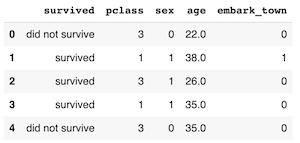

In [7]:
#nétoyage de la data, recherche de valeur manquantes par colonnes. pour age il manque 177 valeurs.
# It's up to you:
titanic.isna().sum()
# 177 data age empty and 2 in embark_town

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [8]:
titanic.dropna(axis=0, inplace=True) # j'élimine les données manquantes du data set Toutes les lignes avec au moins une valeur manquante ont été supprimées.
#Cela signifie que si une ligne avait, par exemple, un âge manquant ou une valeur manquante pour la ville d'embarquement (embark_town), cette ligne entière serait supprimée du DataFrame.

titanic = titanic[['survived', 'pclass', 'sex', 'age', 'embark_town']]

titanic.head()

,survived,pclass,sex,age,embark_town
1,survived,1,female,38.0,Cherbourg
3,survived,1,female,35.0,Southampton
6,did not survive,1,male,54.0,Southampton
10,survived,3,female,4.0,Southampton
11,survived,1,female,58.0,Southampton


In [9]:
#we recode features sex and embark_town into numerical data
titanic['sex'] = titanic['sex'].factorize()[0]
titanic['embark_town'] = titanic['embark_town'].factorize()[0]
titanic.head()

<ipython-input-9-a8a72dbcd9cf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic['sex'] = titanic['sex'].factorize()[0]
<ipython-input-9-a8a72dbcd9cf>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic['embark_town'] = titanic['embark_town'].factorize()[0]


,survived,pclass,sex,age,embark_town
1,survived,1,0,38.0,0
3,survived,1,0,35.0,1
6,did not survive,1,1,54.0,1
10,survived,3,0,4.0,1
11,survived,1,0,58.0,1


In [10]:
#we check the values of sex and embark_town columns
print(titanic['sex'].value_counts())
print(titanic['embark_town'].value_counts())

1    94
0    88
Name: sex, dtype: int64
1    115
0     65
2      2
Name: embark_town, dtype: int64


# KNN classification with Scikit-Learn

## Train Test Split Data


First you have to divide the titanic dataframe into 2 separated dataframes :
  - `y` with the feature to be predicted (i.e. survived)
  - `X` with the other features that will be used for the model (all numeric features + sex recoded with factorize + embark_town recoded with factorize)

And then from `X` and `y`, you need to separate them for training and testing your model :
* Use 75% of data for training, the rest for testing
* Please split data with `random_state = 36`

[See the previous quest on train-test split if needed](https://odyssey.wildcodeschool.com/quests/581)

In [11]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 182 entries, 1 to 889
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     182 non-null    object 
 1   pclass       182 non-null    int64  
 2   sex          182 non-null    int64  
 3   age          182 non-null    float64
 4   embark_town  182 non-null    int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 8.5+ KB


In [12]:
titanic.corr().style.background_gradient(cmap='coolwarm').set_precision(2)
#information sur la table de titanic avec les correlation.

<ipython-input-12-b8d8cd886902>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  titanic.corr().style.background_gradient(cmap='coolwarm').set_precision(2)
<ipython-input-12-b8d8cd886902>:1: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  titanic.corr().style.background_gradient(cmap='coolwarm').set_precision(2)


,pclass,sex,age,embark_town
pclass,1.00,-0.04,-0.31,0.22
sex,-0.04,1.00,0.18,0.06
age,-0.31,0.18,1.00,-0.08
embark_town,0.22,0.06,-0.08,1.00


**Conclusions générales**:
- Il n'y a pas de corrélations extrêmement fortes entre les caractéristiques fournies.
- La corrélation la plus notable est entre `pclass` et `age`, suggérant une possible relation entre l'âge des passagers et la classe de leur billet.
- La plupart des autres corrélations sont faibles, suggérant que ces caractéristiques ne sont pas fortement liées linéairement.

Toutefois, il est essentiel de se rappeler que la corrélation ne signifie pas causalité. Même si deux caractéristiques sont corrélées, cela ne signifie pas nécessairement que l'une cause l'autre. De plus, des relations non linéaires ou plus complexes pourraient ne pas être bien représentées par une simple corrélation linéaire.

La matrice donnée est une matrice de corrélation. Voici ce que l'on peut déduire de chaque valeur :

1. **Diagonale**:
   - La diagonale de la matrice montre la corrélation d'une caractéristique avec elle-même, c'est toujours 1 (parfaitement corrélé).

2. **pclass & autres caractéristiques**:
   - `pclass` vs. `sex`: -0.04 - Très faible corrélation négative. Cela suggère qu'il n'y a pratiquement aucune relation linéaire entre la classe du passager et le sexe.
   - `pclass` vs. `age`: -0.31 - Corrélation négative modérée. Cela pourrait signifier que les passagers des classes supérieures (1ère classe) sont en moyenne plus âgés que ceux des classes inférieures (3ème classe).
   - `pclass` vs. `embark_town`: 0.22 - Faible corrélation positive. Il pourrait y avoir une relation entre la ville d'embarquement et la classe du billet, mais c'est assez faible.

3. **sex & autres caractéristiques**:
   - `sex` vs. `age`: 0.18 - Faible corrélation positive. Il y a une faible tendance suggérant qu'il pourrait y avoir une différence d'âge en fonction du sexe, mais elle n'est pas très forte.
   - `sex` vs. `embark_town`: 0.06 - Très faible corrélation positive. Cela suggère qu'il n'y a pratiquement aucune relation linéaire entre le sexe des passagers et leur ville d'embarquement.

4. **age & autres caractéristiques**:
   - `age` vs. `embark_town`: -0.08 - Très faible corrélation négative. Cela suggère qu'il y a peu ou pas de relation linéaire entre l'âge du passager et la ville d'embarquement.



In [13]:
# Your code here
from sklearn.model_selection import train_test_split
y = titanic['survived'] # ici le label à prédire
X = titanic[['pclass', 'sex', 'age', 'embark_town']] # ici les variables

# Use 75% of data for training, the rest for testing
# Please split data with random_state = 3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.75, random_state = 36)


# ici je regarde les longueurs pour me rendre compte
print("The length of the initial dataset is :", len(X))
print("The length of the train dataset is   :", len(X_train))
print("The length of the test dataset is    :", len(X_test))

The length of the initial dataset is : 182
The length of the train dataset is   : 45
The length of the test dataset is    : 137


## Model initialization

CONGRATS !!! You are going to develop your first ML model for KNN classification.  
For that, please create a `model` object that initialises your model with the KNN classifier


[More info here](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)

In [24]:
# Your code here
modelKNN = KNeighborsClassifier() # distance entre les modèles
modelKNN

KNeighborsClassifier()

## Model fitting


Now you have to fit your model on the training data.

[More info here](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)

In [15]:
# Your code here
modelKNN.fit(X_train, y_train)
print(modelKNN)

KNeighborsClassifier()


In [16]:
# Ici je regarde le scrore // à noter que j'utilise 4 colonne dans mon model, si j'en avais que 3 le score serait meilleur.
modelKNN.score(X,y)

0.6648351648351648

## Make predictions

You model is ready for prediction !

In [17]:
# Your code here
predictions = modelKNN.predict(X_test)
print(predictions)

['did not survive' 'did not survive' 'did not survive' 'survived'
 'survived' 'survived' 'did not survive' 'did not survive' 'survived'
 'did not survive' 'survived' 'survived' 'did not survive'
 'did not survive' 'survived' 'survived' 'did not survive'
 'did not survive' 'survived' 'did not survive' 'survived' 'survived'
 'did not survive' 'did not survive' 'survived' 'survived'
 'did not survive' 'survived' 'survived' 'did not survive' 'survived'
 'survived' 'did not survive' 'survived' 'survived' 'did not survive'
 'did not survive' 'did not survive' 'did not survive' 'survived'
 'did not survive' 'did not survive' 'did not survive' 'survived'
 'survived' 'survived' 'did not survive' 'survived' 'did not survive'
 'survived' 'survived' 'did not survive' 'did not survive' 'survived'
 'survived' 'survived' 'survived' 'survived' 'did not survive'
 'did not survive' 'survived' 'survived' 'survived' 'survived' 'survived'
 'survived' 'did not survive' 'survived' 'did not survive' 'survived

Make prediction for yourself !  
Fill the data below and evaluate your chance of survival ...

In [18]:
# Your code here
# je rentre mes infos pour savoir si j'aurais survécu
my_class = 2
my_sex = 1
my_age = 42
my_town= 1

# ici je transforme le tableau en 3d
my_data = np.array([my_class, my_sex, my_age, my_town]).reshape(1,4)

# ici j'intérroge la prédiction entrainée.
modelKNN.predict(my_data)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['did not survive'], dtype=object)

In [19]:
# Then you can execute this code to see probabilities per class
# cela permet de voir concrètement le taux de survie ou pas
for i, j in zip(modelKNN.classes_, modelKNN.predict_proba(my_data)[0]):
  print("Prediction probability for:", i, "is", j)

Prediction probability for: did not survive is 0.8
Prediction probability for: survived is 0.2


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


## Model evaluation

Last but not least, you should evaluate the accuracy of your model.  
The metric `accuracy_score` is directly imported form `sklearn.metrics `.  
Please remember than other metrics are available to evaluate classification models such as precision, recall, f1 score and all together compose the `confusion matrix`.

In [20]:
# Your code here
from sklearn.metrics import accuracy_score, confusion_matrix

accuracy = accuracy_score (y_test,predictions) # accuracy score : c'est le nombre de prédictions correctes divisé par le total. Donc (TP + TN) / total
confusion_matrix = confusion_matrix(y_test,predictions)

print("accuracy = %.3f" % accuracy)
print("Confusion matrix:\n", confusion_matrix)

accuracy = 0.620
Confusion matrix:
 [[20 23]
 [29 65]]


Performances of our model are pretty poor and could be explained by the original dataset.  
Antoher way is to tune the hyperparameter such as the number of neighbors ...

## Hyperparameter


Let's play with the `n_neighbors` and `weight` hyperparameters of the model.  
* Evaluate the score of your models by adjusting the hyperparameter from 2 to 10.
* What is the values of `n_neighbors` and `weight` that leads to the best score ?

This is our big moment.
We train a KNN learner using the parameters that an observation’s neighborhood is its three closest neighors.
weights = 'uniform' can be thought of as the voting system used.
For example, uniform means that all neighbors get an equally weighted “vote” about an observation’s class
while weights = 'distance' would tell the learner to weigh each observation’s “vote” by its distance from the observation we are classifying.

C'est notre grand moment.
Nous formons un apprenant KNN en utilisant les paramètres selon lesquels le voisinage d'une observation est ses trois voisins les plus proches.
weights = 'uniform' peut être considéré comme le système de vote utilisé.
Par exemple, uniforme signifie que tous les voisins obtiennent un « vote » également pondéré sur la classe d'une observation
tandis que poids = « distance » indiquerait à l'apprenant de peser le « vote » de chaque observation en fonction de sa distance par rapport à l'observation que nous classons.

### **EXEMPLE POUR MIEUX COMPRENDRE**


Imaginez que vous soyez dans une nouvelle ville et que vous vouliez trouver le meilleur endroit pour manger. Vous décidez de demander à trois personnes (vos "trois voisins les plus proches") qui passent près de vous pour obtenir leurs recommandations. C'est un peu comme si vous demandiez à votre modèle KNN de regarder les trois points de données les plus proches pour prendre une décision.

L'option `weights = 'uniform'` est comme si vous accordiez à chacune des trois personnes un vote égal pour leur suggestion. Peu importe si l'une d'entre elles est un chef étoilé au Michelin et que les deux autres n'ont jamais cuisiné de leur vie, leur opinion compte pour un vote.

Cependant, si vous décidiez d'utiliser `weights = 'distance'`, cela signifierait que l'opinion de la personne la plus proche de vous compte davantage que celle des autres. Imaginez que l'une des personnes se trouve juste à côté de vous, la deuxième à quelques mètres et la troisième un peu plus loin. Dans ce scénario, la recommandation de la personne la plus proche aurait plus de poids dans votre décision finale, car vous estimez que sa proximité avec vous la rend plus fiable ou pertinente.

En termes de KNN, utiliser les poids basés sur la distance signifie que les points de données qui sont plus proches de l'observation que vous essayez de classer auront une influence plus significative sur le résultat final que ceux qui sont plus éloignés.

In [21]:
# Your code here
print("for weights = 'distance' : ") # preparation de parametrage distance
max_accuracy =0 # preparation de compteur inital 1
max_weight= '' # preparation de compteur inital 2
max_i=0 # preparation de compteur inital 3

for i in range(2,11): # boucle de 1 à 10
  weight_1='distance' # option du weight distance
  modelKNN= KNeighborsClassifier(n_neighbors=i, weights=weight_1) # parametrage du modele KNN en réptition
  modelKNN.fit(X_train, y_train) # train fit de la data
  predictions = modelKNN.predict(X_test) # prediction de la data
  accuracy = accuracy_score (y_test,predictions)

  print("The accuracy score for a n_neighbors of {} is {}".format(i,round(accuracy,2))) # impression des resultat de la boucles

  if accuracy > max_accuracy: # condition ajustant les résultat de la boucles  si le nouveau resultat est superieur a l'anciens alors
    max_accuracy = accuracy # le max accuracy devient le nouveau résultat
    max_i = i # le max i devient le nouveau resultat i
    max_weight = weight_1 # de meme pour le max_weight





for weights = 'distance' : 
The accuracy score for a n_neighbors of 2 is 0.66
The accuracy score for a n_neighbors of 3 is 0.67
The accuracy score for a n_neighbors of 4 is 0.67
The accuracy score for a n_neighbors of 5 is 0.67
The accuracy score for a n_neighbors of 6 is 0.66
The accuracy score for a n_neighbors of 7 is 0.69
The accuracy score for a n_neighbors of 8 is 0.7
The accuracy score for a n_neighbors of 9 is 0.7
The accuracy score for a n_neighbors of 10 is 0.69


In [22]:
for i in range(2,11):
  weight_2='uniform' # same code juste changement entre uniform et  distance

  modelKNN= KNeighborsClassifier(n_neighbors=i, weights=weight_2)
  modelKNN.fit(X_train, y_train)

  predictions = modelKNN.predict(X_test)
  accuracy = accuracy_score (y_test,predictions)

  print("The accuracy score for a n_neighbors of {} is {}".format(i,round(accuracy,2)))

  if accuracy > max_accuracy:
    max_accuracy = accuracy
    max_i = i
    max_weight = weight_2


The accuracy score for a n_neighbors of 2 is 0.53
The accuracy score for a n_neighbors of 3 is 0.63
The accuracy score for a n_neighbors of 4 is 0.58
The accuracy score for a n_neighbors of 5 is 0.62
The accuracy score for a n_neighbors of 6 is 0.62
The accuracy score for a n_neighbors of 7 is 0.68
The accuracy score for a n_neighbors of 8 is 0.67
The accuracy score for a n_neighbors of 9 is 0.66
The accuracy score for a n_neighbors of 10 is 0.64


In [23]:
print('The best accuracy {} is with a n_neighbors of {} and a weights {}'.format(round(max_accuracy,3), max_i, max_weight))

The best accuracy 0.701 is with a n_neighbors of 8 and a weights distance
